# Лабораторная работа 2

**Внимание!** За эту работу можно получить не более 10 баллов. Так что вы можете выбрать, какие из заданий вам более интересны, и делать их. Оценка будет равна минимуму из 10 и полученного вами числа баллов.

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ --- столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ --- столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением --- то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N - количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором - тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом - $n$ точек (значения аргумента $x$), во втором - значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача - по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [528]:
import numpy
data_train = numpy.loadtxt('C:/Users/July/Downloads/train.txt', delimiter=',')
data_test = numpy.loadtxt('C:/Users/July/Downloads/test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [529]:
X_train = data_train[:,0]
y_train = data_train[:,1]

# Сделайте то же для тестовой выборки
X_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [530]:
x = numpy.array([X_train]).T
ones = numpy.array([numpy.ones(len(X_train))]).T
X = numpy.concatenate((x, ones), axis = 1)
y = numpy.array([y_train]).T
a = numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X.T, X)), X.T), y)
k = a[0]
b = a[1]
print('Answer : y =', k[0], '* x +', b[0])

Answer : y = 2.27913449805195 * x + 4.433230905064935


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

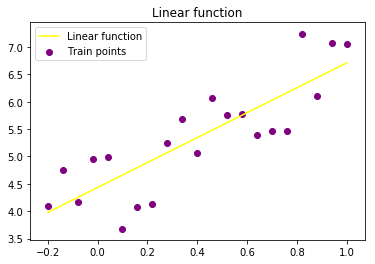

In [531]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
plt.title('Linear function')

plt.scatter(X_train[0], y_train[0], color = "purple", label = 'Train points')
for i in range(1, len(X_train)):
    plt.scatter(X_train[i], y_train[i], color = "purple")

y_graph = []
for x in X_train:
    y_graph.append(k * x + b)
line = plt.plot(X_train, y_graph, color = "yellow", label = 'Linear function')

def coefs_search(X, y):
    return numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X.T, X)), X.T), y)


def polynomial(n): #полином n-степени
    X = numpy.array([X_train]).T
    for i in range(2, n + 1):
        now = []
        for j in X_train:
            now.append(j ** i)
        X = numpy.concatenate((np.array([now]).T, X), axis = 1)
    ones = numpy.array([numpy.ones(len(X_train))]).T
    X = numpy.concatenate((X, ones), axis = 1)
    y = numpy.array([y_train]).T
    if n == 20:
        return numpy.linalg.solve(X, y)
    return coefs_search(X, y);

#построение
def Paint(a, X_t, y_t, string):
    y_graph = []
    i = X_t[0]
    x_graph = []
    while i <= X_t[-1]:
        now = 0
        x_graph.append(i)
        for j in range(len(a)):
            now += (a[len(a) - 1 - j] * (i ** j))
        y_graph.append(now)
        i += 0.0001
    plt.plot(x_graph, y_graph, label = string)
    
#поиск ошибки
def Error(a, X_t, y_t):    
    q = len(X_t)
    error = 0
    y_graph = []
    y = numpy.array([y_t]).T
    for i in X_t:
        now = 0
        for j in range(len(a)):
            now += (a[len(a) - 1 - j] * (i ** j))
        y_graph.append(now)
    for i in range(q):
        error += ((y_graph[i] - y[i]) ** 2)
    error /= q
    return error

plt.legend()

Так как мы знаем, что имея n точек, мы можем составить единственный полином n - 1 степени, определенный во всех этих точках(интерполяционный многочлен Лагранжа), другими словами, ошибка на таком полиноме будет близка к нулю, и так мы сможем найти полином, максимально приближающий искомую функцию 

Error on Train : 1.0456808405287207e-08 
Error on Test: 554210334617.5054


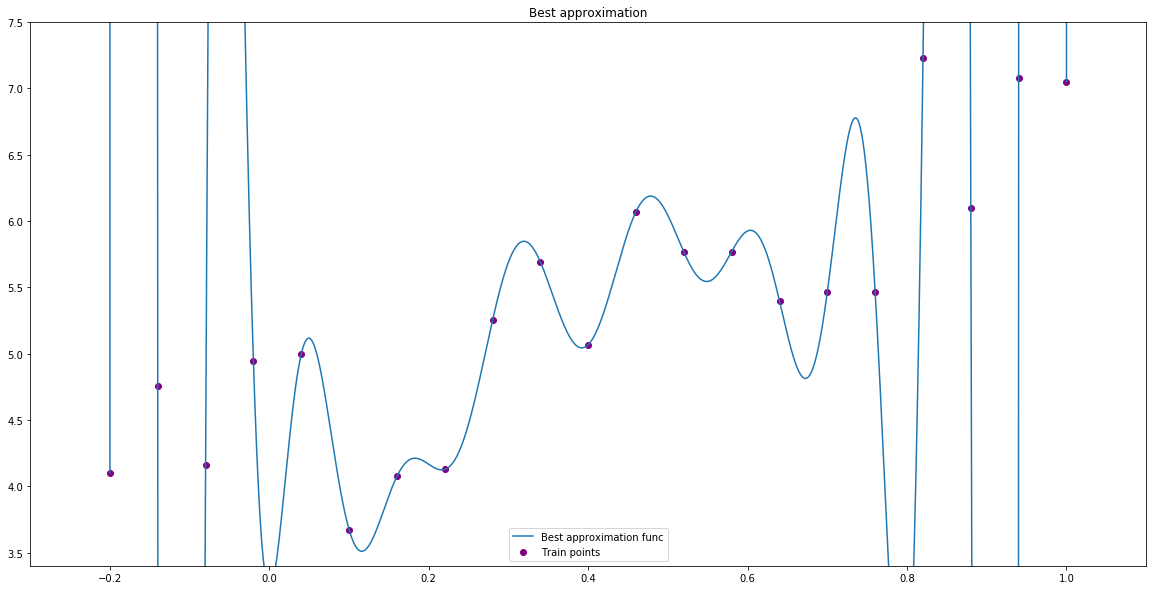

In [532]:
new_fig = plt.figure(figsize = (20, 10))
plt.axis([-0.3, 1.1, 3.4, 7.5])
plt.title('Best approximation')
plt.scatter(X_train[0], y_train[0], color = "purple", label = 'Train points')
for i in range(1, len(X_train)):
    plt.scatter(X_train[i], y_train[i], color = "purple")
answer = polynomial(20)
Paint(answer, X_train, y_train, 'Best approximation func')
print('Error on Train :', Error(answer, X_train, y_train)[0], '\nError on Test:', Error(answer, X_test, y_test)[0])
plt.legend()

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [533]:
print('0\tTrain error\tTest error\n')
for k in range(1, 11):
    answer = polynomial(k)
    print(k, '\t', Error(answer, X_train, y_train), '\t', Error(answer, X_test, y_test), '\n')
print('Заметим, что наименьшая ошибка получается на полиноме третьей степени, значит многочлен этой степени лучше всего        приближает неизвестную зависимость\n')
print('Coefs:\n')
for i in range(1, 7):
    answer = polynomial(i)
    print('Degree = ', i, ':\t', sep='')
    for j in answer:
        print(j[0])
    print('\n')

0	Train error	Test error

1 	 [0.29689663] 	 [0.4351202] 

2 	 [0.26969892] 	 [0.35647629] 

3 	 [0.26949719] 	 [0.35534646] 

4 	 [0.26106653] 	 [0.44172702] 

5 	 [0.24998505] 	 [0.5579732] 

6 	 [0.18829349] 	 [2.58169293] 

7 	 [0.18539621] 	 [2.5157829] 

8 	 [0.15905557] 	 [4.35728862] 

9 	 [0.15847184] 	 [4.77634423] 

10 	 [0.15316611] 	 [14.63233485] 

Заметим, что наименьшая ошибка получается на полиноме третьей степени, значит многочлен этой степени лучше всего        приближает неизвестную зависимость

Coefs:

Degree = 1:	
2.27913449805195
4.433230905064935


Degree = 2:	
1.4016285121152792
1.1578316883597197
4.472476503404163


Degree = 3:	
-0.3817686042873505
1.8597508372604432
1.0650161052853142
4.460736355285108


Degree = 4:	
7.918474697304305
-13.05132811998071
6.794091784355054
1.1718023926318397
4.3411661203997705


Degree = 5:	
29.52497804128977
-51.13148138537815
21.374796276244872
3.27471440181915
-0.13059803987920438
4.4312978138235035


Degree = 6:	
-229.97013

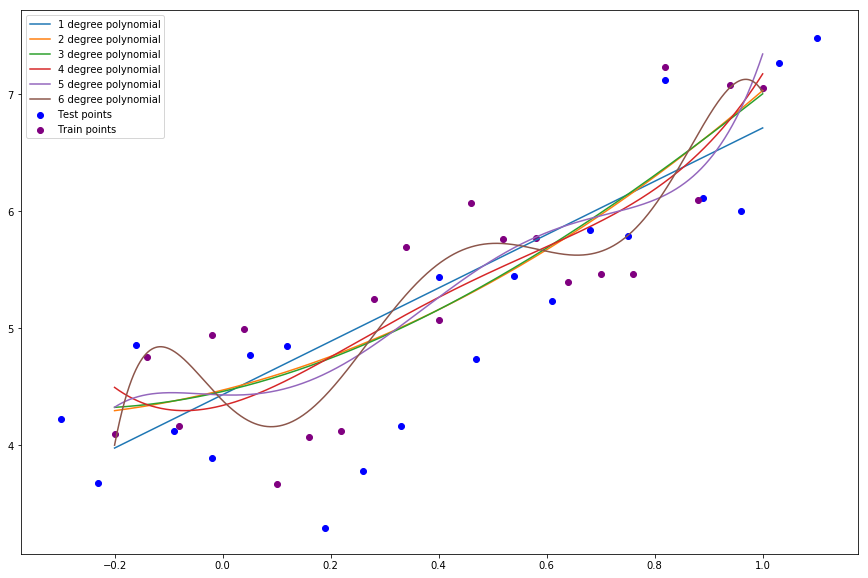

In [534]:
fig = plt.figure(figsize=(15, 10))
#тестовые точки
plt.scatter(X_test[0], y_test[0], color = "blue", label = 'Test points')
for i in range(1, len(X_test)):
    plt.scatter(X_test[i], y_test[i], color = "blue")
#тренировочные точки
plt.scatter(X_train[0], y_train[0], color = "purple", label = 'Train points')
for i in range(1, len(X_train)):
    plt.scatter(X_train[i], y_train[i], color = "purple")

for i in range(1, 7):
    answer = polynomial(i)
    s = i.__str__()
    string = s + " degree polynomial"
    Paint(answer, X_train, y_train, string)

plt.legend()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

При росте степени многочлена, ошибка для тренировочного набора уменьшается, а для тестового растет(из таблицы выше). Это связано с тем, что составляя функцию, мы определяем ее лишь на тренировочном наборе точек, но при этом тестовый набор на искомой функции никак не учитывается. Получается, что мы приближаем кривую к тренировочным точкам, тем самым незначительно отдаляя ее от усредненного значения, и увеличиваем ошибку на тестовом наборе. Для более наглядного понимания построим график полинома десятой степени на тестовом наборе точек:

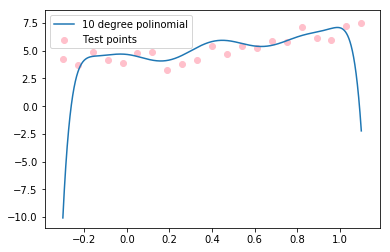

In [535]:
Paint(polynomial(10), X_test, y_test, "10 degree polinomial")
plt.scatter(X_test[0], y_test[0], color = "pink", label = 'Test points')
for i in range(1, len(X_test)):
    plt.scatter(X_test[i], y_test[i], color = "pink")
plt.legend()

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [536]:
flats_mod = numpy.loadtxt('C:/Users/July/Downloads/flats_moscow_mod.txt', delimiter='\t', skiprows = 1)
X_mod = []
y_mod = flats_mod[:,0]
for i in range(1, 6):
    X_mod.append(flats_mod[:, i])

def flats_polynomial(X, y):
    return numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X.T, X)), X.T), y)

def array_from_matrix(X_mod):
    X = numpy.array([X_mod[0]]).T
    for i in range(1, len(X_mod)):
        X = numpy.concatenate((X, numpy.array([X_mod[i]]).T), axis = 1)
    ones = numpy.array([numpy.ones(len(y_mod))]).T
    X = numpy.concatenate((X, ones), axis = 1)
    return X

X = array_from_matrix(X_mod)
y = numpy.array([y_mod]).T
a = flats_polynomial(X, y)
print('Coefs:\n', a, '\n')

def Flats_error(a, X, y):    
    q = len(X)
    error = 0
    Y = []
    for i in X:
        now = 0
        for j in range(len(i)):
            now += a[j] * i[j]
        Y.append(now)
    for i in range(q):
        error += ((Y[i] - y[i]) ** 2)
    error /= q
    return error

old_error = Flats_error(a, X, y)[0]
print('Error =', old_error)

Coefs:
 [[  1.48705289]
 [  1.656289  ]
 [  1.81920498]
 [ -3.32715406]
 [ -1.3156886 ]
 [-26.78926963]] 

Error = 924.009003208396


Заметим, что так как найденные коэффициенты отражают линейную зависимость, значит, что если параметр имеет положительный коэффициент, то он положительно влияет на итоговую цену, другими словами если такой параметр увеличивается, то растет итоговая цена, если же параметр имеет отрицателный коэффициент, то его рост способствует понижению цены.

Это легко понять, узнав, на каких параметрах мы получили положительные и отрицательные коэффициениты. Например, при росте расстояния квартиры от центра или от метро, ее цена снижается, так как чем ближе квартира к центру, тем больше желание ее купить. Иными словами, знак коэффициента показывает, является ли параметр полезным для качества квартиры, или же наоборот, портит ее качество.

Стоит отметить, что ошибка при таком методе достаточно велика.

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [517]:
from sklearn.model_selection import train_test_split as tts
from math import sin
from math import cos

#В цикле считаем среднюю ошибку, так как разбиение рандомное и один тест ничего не даст
counter = 0
for i in range(1000):
    X_train, X_test, y_train, y_test = tts(X, y)

#Добавим произведение 1, 2 и 4 параметров
    new_row = []
    for i in range(len(X_train)):
        new_row.append(X_train[i][0] * X_train[i][1] * X_train[i][3])
    X_train_array = numpy.concatenate((numpy.array([new_row]).T, X_train), axis = 1)
#Теперь произведение остальных параметров
    new_row = []
    for i in range(len(X_train)):
        new_row.append(X_train[i][2] * X_train[i][4])
    X_train_array = numpy.concatenate((numpy.array([new_row]).T, X_train_array), axis = 1)
#Теперь добавим квадраты параметров
    for j in range(5):
        new_row = []
        for i in range(len(X_train)):
            new_row.append(X_train[i][j] * X_train[i][j])
        X_train_array = numpy.concatenate((numpy.array([new_row]).T, X_train_array), axis = 1)
#Теперь кубы
    for j in range(5):
        new_row = []
        for i in range(len(X_train)):
            new_row.append(X_train[i][j] * X_train[i][j] * X_train[i][j])
        X_train_array = numpy.concatenate((numpy.array([new_row]).T, X_train_array), axis = 1)
#Теперь синусы(ну а что мешает?)
    for j in range(5):
        new_row = []
        for i in range(len(X_train)):
            new_row.append(sin(X_train[i][j]))
        X_train_array = numpy.concatenate((numpy.array([new_row]).T, X_train_array), axis = 1)
#Теперь косинусы
    for j in range(5):
        new_row = []
        for i in range(len(X_train)):
            new_row.append(cos(X_train[i][j]))
        X_train_array = numpy.concatenate((numpy.array([new_row]).T, X_train_array), axis = 1)
    
#Так как мы точно не знаем, какие функции какой результат дадут, мы просто добавим
#и экспериментальным путем проверим, насколько они улучшают нашу зависимость

#Создадим аналогичную матрицу, но с тестовой подборкой
    new_row = []
    for i in range(len(X_test)):
        new_row.append(X_test[i][0] * X_test[i][1] * X_test[i][3])
    X_test_array = numpy.concatenate((numpy.array([new_row]).T, X_test), axis = 1)
    new_row = []
    for i in range(len(X_test)):
        new_row.append(X_test[i][2] * X_test[i][4])
    X_test_array = numpy.concatenate((numpy.array([new_row]).T, X_test_array), axis = 1)
    for j in range(5):
        new_row = []
        for i in range(len(X_test)):
            new_row.append(X_test[i][j] * X_test[i][j])
        X_test_array = numpy.concatenate((numpy.array([new_row]).T, X_test_array), axis = 1)
    for j in range(5):
        new_row = []
        for i in range(len(X_test)):
            new_row.append(X_test[i][j] * X_test[i][j] * X_test[i][j])
        X_test_array = numpy.concatenate((numpy.array([new_row]).T, X_test_array), axis = 1)
    for j in range(5):
        new_row = []
        for i in range(len(X_test)):
            new_row.append(sin(X_test[i][j]))
        X_test_array = numpy.concatenate((numpy.array([new_row]).T, X_test_array), axis = 1)
    for j in range(5):
        new_row = []
        for i in range(len(X_test)):
            new_row.append(cos(X_test[i][j]))
        X_test_array = numpy.concatenate((numpy.array([new_row]).T, X_test_array), axis= 1)

    
    a = flats_polynomial(X_train_array, y_train)
    counter += Flats_error(a, X_test_array, y_test)

print('Error =', (counter / 1000)[0])
print((100 - (counter / 10) / old_error)[0], 'percent better model!')

Error = 740.9292841404038
19.81362935126093 percent better model!


### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы - необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [537]:
data_train = numpy.loadtxt('C:/Users/July/Downloads/train.txt', delimiter=',')
data_test = numpy.loadtxt('C:/Users/July/Downloads/test.txt', delimiter=',')
X_train = data_train[:,0]
y_train = data_train[:,1]
X_test = data_test[:,0]
y_test = data_test[:,1]

def new_coefs_search(X, y):
    #Берем произвольную lamda
    lam = 1
    print('Old determinant =', numpy.linalg.det(numpy.dot(X.T, X)))
    print('New detrminant = ', numpy.linalg.det(numpy.dot(X.T, X) + lam * np.identity(len(X.T))))
    return numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X.T, X) + lam * np.identity(len(X.T))), X.T), y)

def new_polynomial(n): #полином n-степени
    X = numpy.array([X_train]).T
    for i in range(2, n + 1):
        now = []
        for j in X_train:
            now.append(j ** i)
        X = numpy.concatenate((np.array([now]).T, X), axis = 1)
    ones = numpy.array([numpy.ones(len(X_train))]).T
    X = numpy.concatenate((X, ones), axis = 1)
    y = numpy.array([y_train]).T
    if n == 20:
        return numpy.linalg.solve(X, y)
    return new_coefs_search(X, y);

old_coefs = polynomial(6)
new_coefs = new_polynomial(6)
print('Old train error =', Error(old_coefs, X_train, y_train)[0], '\nOld test error =', Error(old_coefs, X_test, y_test)[0])
print('При lambda = 1:')
print('New train error =', Error(new_coefs, X_train, y_train)[0], '\nNew test error =', Error(new_coefs, X_test, y_test)[0])

Old determinant = 9.082864838636828e-12
New detrminant =  509.2164507942172
Old train error = 0.18829348988369696 
Old test error = 2.581692932957288
При lambda = 1:
New train error = 0.31961107399035477 
New test error = 0.3082199235712286


Можно заметить, что раньше многочленом оптимальной степени для тестовой подборки являлся многочлен 3 степени, на них была минимальная ошибка равная 0.35, теперь же даже на многочлене 6 степени при произвольно взятой     $\lambda$ = 1 ошибка состовляет всего 0.308, что меньше 0.35. То есть $\lambda$ = 1 является "хорошей" ламбдой. А старый определитель в разы меньше, чем новый, что видно на данных выше.

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

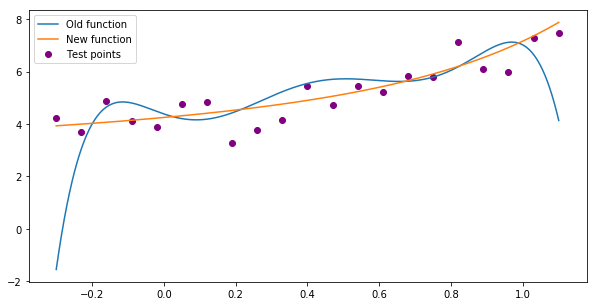

In [538]:
fig = plt.figure(figsize= (10, 5))

plt.scatter(X_test[0], y_test[0], color = "purple", label = 'Test points')
for i in range(1, len(X_test)):
    plt.scatter(X_test[i], y_test[i], color = "purple")

Paint(old_coefs, X_test, y_test, 'Old function')
Paint(new_coefs, X_test, y_test, 'New function')
plt.legend()

По графику видно, что хоть старый график и ближе к некоторым средним точкам, на крайних он уходит сильно вниз, что дает очень большую ошибку, в то же время новый график незначительно хуже на средних точках, зато значительно лучше на крайних, по графику видно, что на нем практически нет перепадов, а значит и в общем ошибка оказывается меньше.

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

Сначала распишем ту функцию, которую нам надо минимизировать:
$$$$
$$|Xa - y|^2 + \lambda|a|^2 = (x_{11} a_1 + ... + x_{1n} a_n - y_1) ^ 2 + ... + (x_{m1} a_1 + ... + x_{mn} a_n - y_m) ^ 2 + \lambda (a_1 ^ 2 + ... + a_n ^ 2)$$
$$$$
Так как мы решаем задачу минимизации по нескольким параметрам(в нашем случае это а), то возьмем производные по всем a и приравняем к 0:
$$$$
$$2x_{11}(x_{11} a_1 + ... + x_{1n} a_n - y_1) + ... + 2x_{m1}(x_{m1} a_1 + ... + x_{mn} a_n - y_m) + 2\lambda a_1 = 0$$
$$. . .$$
$$2x_{1n}(x_{11} a_1 + ... + x_{1n} a_n - y_1) + ... + 2x_{mn}(x_{m1} a_1 + ... + x_{mn} a_n - y_m) + 2\lambda a_n = 0$$
$$$$
Поделим все на 2, вынесем скобки за скобку, перенесем ламбды в правую часть и запишем в виде СЛУ, получим:
$$$$
$$\begin{pmatrix}
x_{11} & x_{21} & \ldots & x_{m1}\\
x_{12} & x_{22} & \ldots & x_{m2}\\
\dots & \dots & \dots & \dots\\
x_{1n} & x_{2n} & \ldots & x_{mn}
\end{pmatrix} \cdot
\begin{pmatrix}
x_{11}a_1 + \ldots + x_{1n}a_n - y_1\\
\dots\\
\dots\\
x_{m1} + \ldots + x_{mn}a_n - y_n
\end{pmatrix} = - \lambda
\begin{pmatrix}
a_1\\
\dots\\
\dots\\
a_n
\end{pmatrix}$$
$$$$
Ну а теперь вернемся к изначальному виду уравнения:
$$$$
$$X^T(Xa - y) = - \lambda a$$
$$X^TXa + \lambda a = X^Ty$$
$$(X^TX + \lambda E) a = X^Ty$$
$$a = (X^TX + \lambda E)^{-1}X^Ty$$
$$$$
Получили искомую формулу, что и требовалось доказать.

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной, и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Обозначим $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

In [ ]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # your code goes here
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        y_pred = #...
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ - матрица с ортонормированными столбцами, а $R$ - верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ - столбцы матрицы $A$, $q_1,\ldots,q_t$ - столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ - это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.